In [1]:
%pylab inline
%matplotlib inline
import io
import h5py 
import pandas as pd
import scipy as sp
import numpy as np
from PIL import Image
from fractions import Fraction

from scipy import optimize 
from scipy.optimize import curve_fit,least_squares
from lmfit.models import GaussianModel
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colorbar import ColorbarBase, make_axes_gridspec


Populating the interactive namespace from numpy and matplotlib


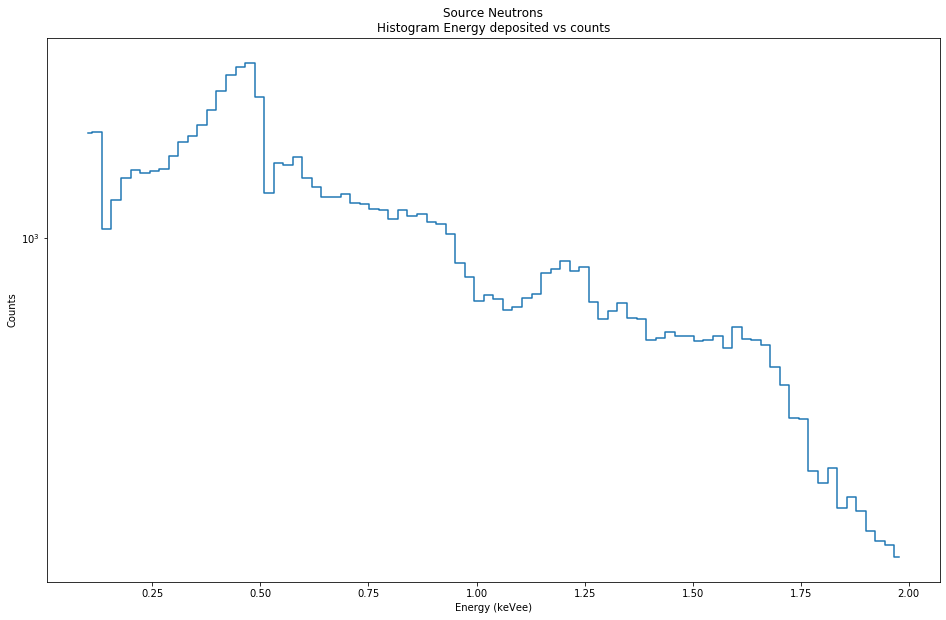

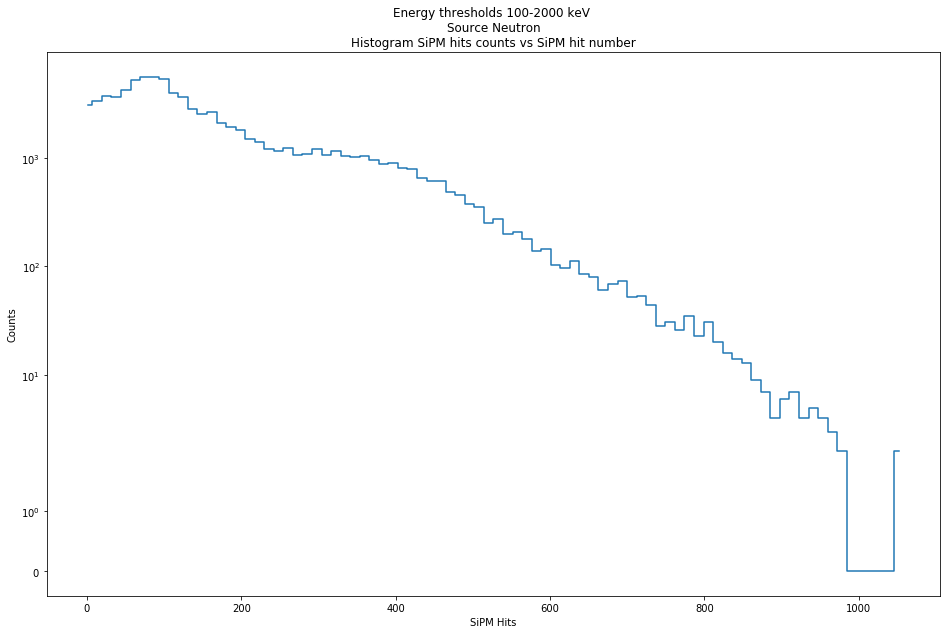

In [2]:
## Cube Neutrons two inches from scintilator
## Neutrons energies same as Na22s
## one inch 

# Thresholds minimums
energy_deposit_threshold = 0.1
energy_deposit_threshold_max =2
photon_threshold = 0
SiPM_hit_threshold = 0
LCE_threshold = 0
distance_threshold =  0 #inch

# Indexing for data sets

dfs = []

SiPM_n,widths = 1, 1
# Arrays
bins = 86                              # distance from SiPM
mins = np.zeros((SiPM_n,widths))          # minimum distance
maxs = np.zeros((SiPM_n,widths))          # maximum didtance
bes = np.zeros((SiPM_n,widths,bins+1))    # bin edges
bcs = np.zeros((SiPM_n,widths,bins))      # bin centers
averages = np.zeros((SiPM_n,widths,bins)) # average LCE per distances
fileName = 'cube_neutron/build-cube_neutron/LXe_cube_nt_Neutron.csv'
df = []
nmp = []
pos = []
dist = []
for j in range(1):
    df.append(pd.read_csv(fileName, sep=',',header=None, skiprows=range(0,10),
                names=('Energy Deposited', 'SiPM Hits', 'Photons',
                        'x_pos','y_pos','z_pos')))
    df[j]['LCE']=df[j]['SiPM Hits']/df[j]['Photons']
    df[j]['log(LCE)']=log(df[j]['SiPM Hits']/df[j]['Photons'])
    nmp.append(df[j].to_numpy())
    pos.append(nmp[j][:,3:6])
    pos[j][:,2]=pos[j][:,2]-min(pos[j][:,2])
    pos[j]= pos[j]/25.4
    dist.append(sqrt(sum(pos[j]**2,axis=1)))
    df[j]['z_pos'] = pos[j][:,2].tolist()
    df[j]['y_pos'] = pos[j][:,1].tolist()
    df[j]['x_pos'] = pos[j][:,0].tolist()
    df[j]['Distance'] = dist[j].tolist()
dfs.append(df)

## Graphs
for i in range(1):  
    for j in range(1): 
        dfs[i][j] = dfs[i][j][dfs[i][j]['Energy Deposited']>=energy_deposit_threshold]
        dfs[i][j] = dfs[i][j][dfs[i][j]['Energy Deposited']<=energy_deposit_threshold_max]
        dfs[i][j] = dfs[i][j][dfs[i][j]['Photons']>=photon_threshold]
        dfs[i][j] = dfs[i][j][dfs[i][j]['LCE']>=LCE_threshold]
        dfs[i][j] = dfs[i][j][dfs[i][j]['SiPM Hits']>=SiPM_hit_threshold]
        dfs[i][j] = dfs[i][j][dfs[i][j]['Distance']>=distance_threshold] 
        mins[i,j]= np.min(dfs[i][j]['Distance'])
        maxs[i,j]= np.max(dfs[i][j]['Distance'])
        bes[i,j,:] = np.linspace(mins[i,j],maxs[i,j],bins+1)
        bcs[i,j,:] = bes[i,j,:-1] + np.diff(bes[i,j,:]) / 2.
        arraY = dfs[i][j]['Distance']
        for k in range(bins):
            msk = arraY>=bes[i,j,k]
            mask = arraY<bes[i,j,k+1]
            mk = msk == mask         
            averages[i,j,k] = dfs[i][j]['LCE'][mk].mean()

plt.figure(figsize=(16,10))
plt.title('Source Neutrons\nHistogram Energy deposited vs counts')
plt.xlabel('Energy (keVee)')
plt.ylabel('Counts')
plt.yscale('symlog')
counts, num = histogram(dfs[0][0]['Energy Deposited'],bins=bins)
plot(num[:-1],(counts),drawstyle='steps-mid')
show()          
            
plt.figure(figsize=(16,10))
plt.title('Energy thresholds {:.0f}-{:.0f} keV \nSource Neutron\nHistogram SiPM hits counts vs SiPM hit number'.format(energy_deposit_threshold*1000,energy_deposit_threshold_max*1000))
plt.xlabel('SiPM Hits')
plt.ylabel('Counts')
plt.yscale('symlog')
counts, num = histogram(dfs[0][0]['SiPM Hits'],bins=bins)
plot(num[:-1],counts,drawstyle='steps-mid')
show()

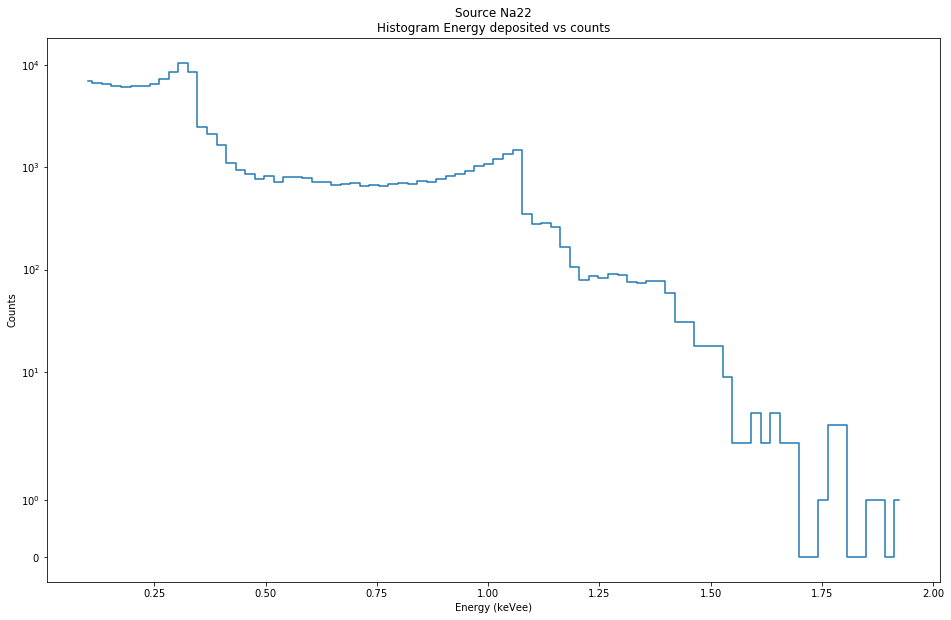

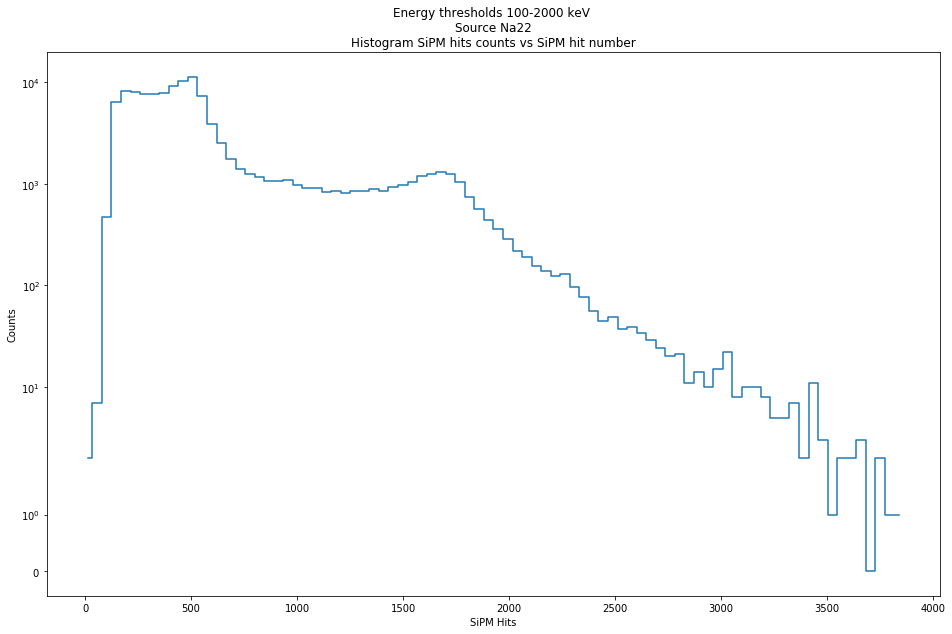

In [3]:
## Cube Na22 two inches from scintilator
## one inch 

# Thresholds minimums
energy_deposit_threshold = 0.1
energy_deposit_threshold_max =2
photon_threshold = 0
SiPM_hit_threshold = 0
LCE_threshold = 0
distance_threshold =  0 #inch

# Indexing for data sets

dfs = []

SiPM_n,widths = 1, 1
# Arrays
bins = 86                              # distance from SiPM
mins = np.zeros((SiPM_n,widths))          # minimum distance
maxs = np.zeros((SiPM_n,widths))          # maximum didtance
bes = np.zeros((SiPM_n,widths,bins+1))    # bin edges
bcs = np.zeros((SiPM_n,widths,bins))      # bin centers
averages = np.zeros((SiPM_n,widths,bins)) # average LCE per distances
fileName = 'cube_Na22/build-cube_Na22/LXe_cube_nt_Na22.csv'
df = []
nmp = []
pos = []
dist = []
for j in range(1):
    df.append(pd.read_csv(fileName, sep=',',header=None, skiprows=range(0,10),
                names=('Energy Deposited', 'SiPM Hits', 'Photons',
                        'x_pos','y_pos','z_pos')))
    df[j]['LCE']=df[j]['SiPM Hits']/df[j]['Photons']
    df[j]['log(LCE)']=log(df[j]['SiPM Hits']/df[j]['Photons'])
    nmp.append(df[j].to_numpy())
    pos.append(nmp[j][:,3:6])
    pos[j][:,2]=pos[j][:,2]-min(pos[j][:,2])
    pos[j]= pos[j]/25.4
    dist.append(sqrt(sum(pos[j]**2,axis=1)))
    df[j]['z_pos'] = pos[j][:,2].tolist()
    df[j]['y_pos'] = pos[j][:,1].tolist()
    df[j]['x_pos'] = pos[j][:,0].tolist()
    df[j]['Distance'] = dist[j].tolist()
dfs.append(df)

## Graphs
for i in range(1):  
    for j in range(1): 
        dfs[i][j] = dfs[i][j][dfs[i][j]['Energy Deposited']>=energy_deposit_threshold]
        dfs[i][j] = dfs[i][j][dfs[i][j]['Energy Deposited']<=energy_deposit_threshold_max]
        dfs[i][j] = dfs[i][j][dfs[i][j]['Photons']>=photon_threshold]
        dfs[i][j] = dfs[i][j][dfs[i][j]['LCE']>=LCE_threshold]
        dfs[i][j] = dfs[i][j][dfs[i][j]['SiPM Hits']>=SiPM_hit_threshold]
        dfs[i][j] = dfs[i][j][dfs[i][j]['Distance']>=distance_threshold] 
        mins[i,j]= np.min(dfs[i][j]['Distance'])
        maxs[i,j]= np.max(dfs[i][j]['Distance'])
        bes[i,j,:] = np.linspace(mins[i,j],maxs[i,j],bins+1)
        bcs[i,j,:] = bes[i,j,:-1] + np.diff(bes[i,j,:]) / 2.
        arraY = dfs[i][j]['Distance']
        for k in range(bins):
            msk = arraY>=bes[i,j,k]
            mask = arraY<bes[i,j,k+1]
            mk = msk == mask         
            averages[i,j,k] = dfs[i][j]['LCE'][mk].mean()

plt.figure(figsize=(16,10))
plt.title('Source Na22\nHistogram Energy deposited vs counts')
plt.xlabel('Energy (keVee)')
plt.ylabel('Counts')
plt.yscale('symlog')
counts, num = histogram(dfs[0][0]['Energy Deposited'],bins=bins)
plot(num[:-1],(counts),drawstyle='steps-mid')
show()          
            
plt.figure(figsize=(16,10))
plt.title('Energy thresholds {:.0f}-{:.0f} keV \nSource Na22\nHistogram SiPM hits counts vs SiPM hit number'.format(energy_deposit_threshold*1000,energy_deposit_threshold_max*1000))
plt.xlabel('SiPM Hits')
plt.ylabel('Counts')
plt.yscale('symlog')
counts, num = histogram(dfs[0][0]['SiPM Hits'],bins=bins)
plot(num[:-1],counts,drawstyle='steps-mid')
show()

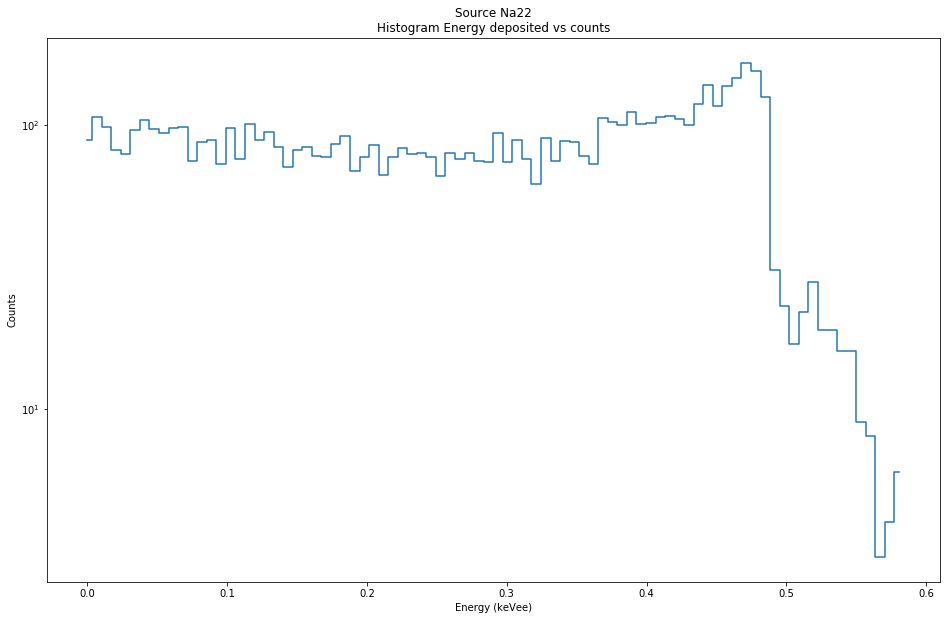

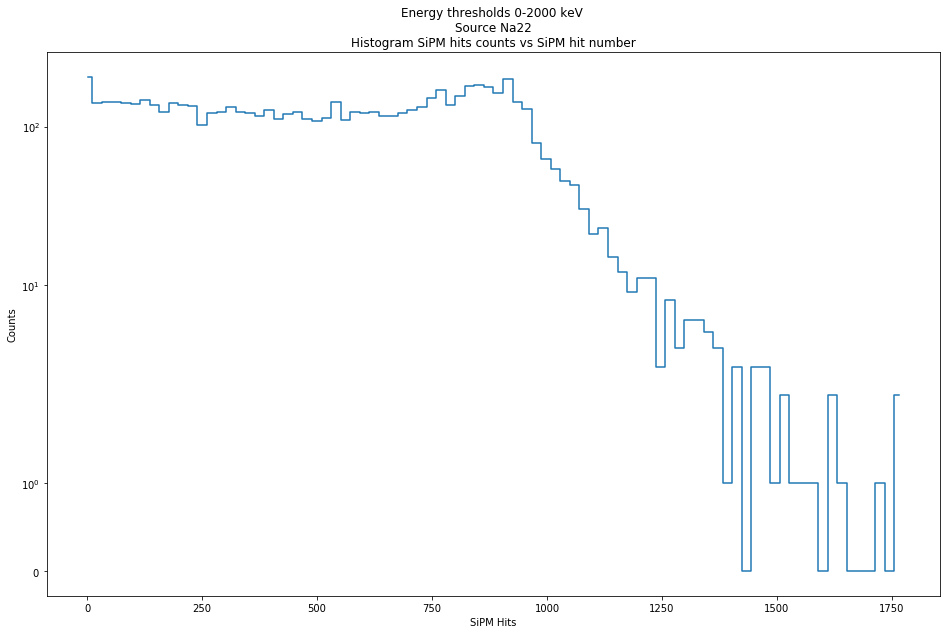

In [7]:
## Cylinder Cs137
##two inches from scintilator

# Thresholds minimums
energy_deposit_threshold = 0
energy_deposit_threshold_max =2
photon_threshold = 0
SiPM_hit_threshold = 0
LCE_threshold = 0
distance_threshold =  0 #inch

# Indexing for data sets

dfs = []

SiPM_n,widths = 1, 1
# Arrays
bins = 86                              # distance from SiPM
mins = np.zeros((SiPM_n,widths))          # minimum distance
maxs = np.zeros((SiPM_n,widths))          # maximum didtance
bes = np.zeros((SiPM_n,widths,bins+1))    # bin edges
bcs = np.zeros((SiPM_n,widths,bins))      # bin centers
averages = np.zeros((SiPM_n,widths,bins)) # average LCE per distances
fileName = 'cylinder_137Cs/build-cylinder_137Cs/LXe_Cylinder_nt_Cs137.csv'
df = []
nmp = []
pos = []
dist = []
for j in range(1):
    df.append(pd.read_csv(fileName, sep=',',header=None, skiprows=range(0,10),
                names=('Energy Deposited', 'SiPM Hits', 'Photons',
                        'x_pos','y_pos','z_pos')))
    df[j]['LCE']=df[j]['SiPM Hits']/df[j]['Photons']
    df[j]['log(LCE)']=log(df[j]['SiPM Hits']/df[j]['Photons'])
    nmp.append(df[j].to_numpy())
    pos.append(nmp[j][:,3:6])
    pos[j][:,2]=pos[j][:,2]-min(pos[j][:,2])
    pos[j]= pos[j]/25.4
    dist.append(sqrt(sum(pos[j]**2,axis=1)))
    df[j]['z_pos'] = pos[j][:,2].tolist()
    df[j]['y_pos'] = pos[j][:,1].tolist()
    df[j]['x_pos'] = pos[j][:,0].tolist()
    df[j]['Distance'] = dist[j].tolist()
dfs.append(df)

## Graphs
for i in range(1):  
    for j in range(1): 
        dfs[i][j] = dfs[i][j][dfs[i][j]['Energy Deposited']>=energy_deposit_threshold]
        dfs[i][j] = dfs[i][j][dfs[i][j]['Energy Deposited']<=energy_deposit_threshold_max]
        dfs[i][j] = dfs[i][j][dfs[i][j]['Photons']>=photon_threshold]
        dfs[i][j] = dfs[i][j][dfs[i][j]['LCE']>=LCE_threshold]
        dfs[i][j] = dfs[i][j][dfs[i][j]['SiPM Hits']>=SiPM_hit_threshold]
        dfs[i][j] = dfs[i][j][dfs[i][j]['Distance']>=distance_threshold] 
        mins[i,j]= np.min(dfs[i][j]['Distance'])
        maxs[i,j]= np.max(dfs[i][j]['Distance'])
        bes[i,j,:] = np.linspace(mins[i,j],maxs[i,j],bins+1)
        bcs[i,j,:] = bes[i,j,:-1] + np.diff(bes[i,j,:]) / 2.
        arraY = dfs[i][j]['Distance']
        for k in range(bins):
            msk = arraY>=bes[i,j,k]
            mask = arraY<bes[i,j,k+1]
            mk = msk == mask         
            averages[i,j,k] = dfs[i][j]['LCE'][mk].mean()

plt.figure(figsize=(16,10))
plt.title('Source Na22\nHistogram Energy deposited vs counts')
plt.xlabel('Energy (keVee)')
plt.ylabel('Counts')
plt.yscale('symlog')
counts, num = histogram(dfs[0][0]['Energy Deposited'],bins=bins)
plot(num[:-1],(counts),drawstyle='steps-mid')
show()          
            
plt.figure(figsize=(16,10))
plt.title('Energy thresholds {:.0f}-{:.0f} keV \nSource Na22\nHistogram SiPM hits counts vs SiPM hit number'.format(energy_deposit_threshold*1000,energy_deposit_threshold_max*1000))
plt.xlabel('SiPM Hits')
plt.ylabel('Counts')
plt.yscale('symlog')
counts, num = histogram(dfs[0][0]['SiPM Hits'],bins=bins)
plot(num[:-1],counts,drawstyle='steps-mid')
show()

In [8]:
(0.5+2)*2.54

6.35

In [9]:
(1.5+2)*2.54

8.89

In [10]:
2.5+25.4*1.5

40.599999999999994

In [11]:
25.4*2


50.8

In [13]:
np.atan(40.6/50.8)

AttributeError: module 'numpy' has no attribute 'atan'